In [1]:
import pandas as pd

Load the Datasets

In [2]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
# Display basic info for each dataset
print("Customers Dataset Info:")
print(customers.info())
print("\nProducts Dataset Info:")
print(products.info())
print("\nTransactions Dataset Info:")
print(transactions.info())

Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   C

In [4]:
# Display first few rows of each dataset
print("\nCustomers Dataset Preview:")
print(customers.head())
print("\nProducts Dataset Preview:")
print(products.head())
print("\nTransactions Dataset Preview:")
print(transactions.head())


Customers Dataset Preview:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset Preview:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset Preview:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54       

Data Cleaning & Exploration

In [6]:
# Check for missing values
print("Missing Values in Customers Dataset:")
print(customers.isnull().sum())

print("\nMissing Values in Products Dataset:")
print(products.isnull().sum())

print("\nMissing Values in Transactions Dataset:")
print(transactions.isnull().sum())


Missing Values in Customers Dataset:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products Dataset:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions Dataset:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [7]:
# Check for duplicates
print("\nDuplicate Rows in Customers Dataset:", customers.duplicated().sum())
print("Duplicate Rows in Products Dataset:", products.duplicated().sum())
print("Duplicate Rows in Transactions Dataset:", transactions.duplicated().sum())


Duplicate Rows in Customers Dataset: 0
Duplicate Rows in Products Dataset: 0
Duplicate Rows in Transactions Dataset: 0


In [8]:

# Summary statistics for numerical columns
print("\nSummary Statistics - Customers Dataset:")
print(customers.describe(include='all'))

print("\nSummary Statistics - Products Dataset:")
print(products.describe(include='all'))

print("\nSummary Statistics - Transactions Dataset:")
print(transactions.describe(include='all'))


Summary Statistics - Customers Dataset:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

Summary Statistics - Products Dataset:
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN                    NaN      NaN  292.8

Exploratory Data Analysis

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Convert dates to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

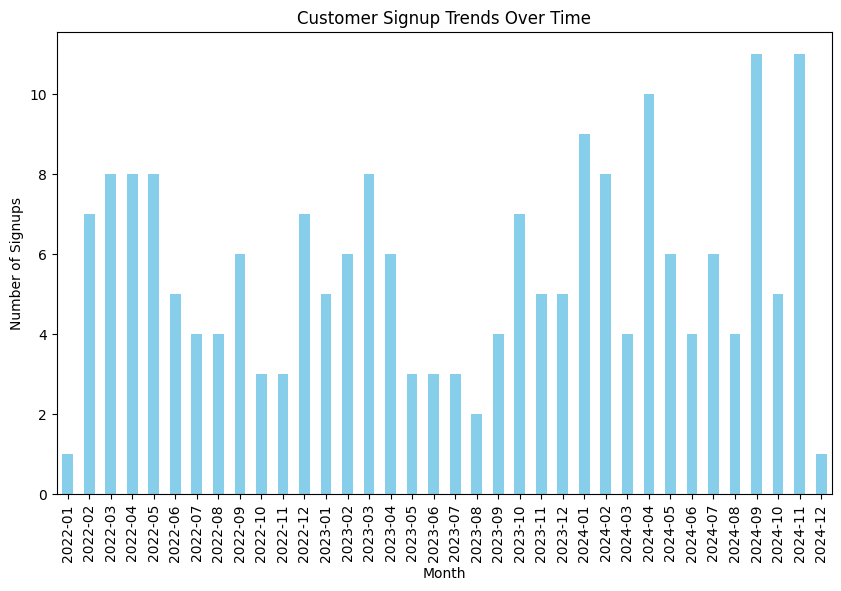

In [11]:
# 1. Customer Signup Trends
plt.figure(figsize=(10, 6))
customers['SignupDate'].dt.to_period('M').value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Customer Signup Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.show()

C:\Users\shetd\AppData\Local\Temp\ipykernel_241800\1416077932.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Category', data=products, palette='viridis', order=products['Category'].value_counts().index)


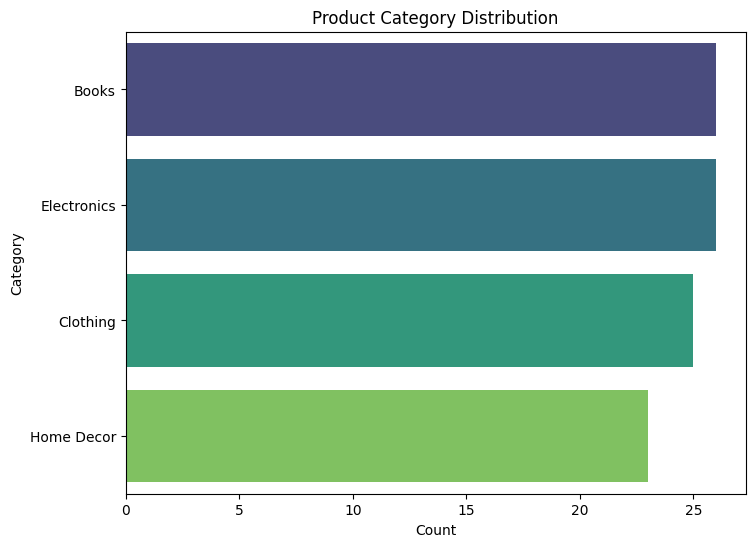

In [12]:
# 2. Product Category Distribution
plt.figure(figsize=(8, 6))
sns.countplot(y='Category', data=products, palette='viridis', order=products['Category'].value_counts().index)
plt.title('Product Category Distribution')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

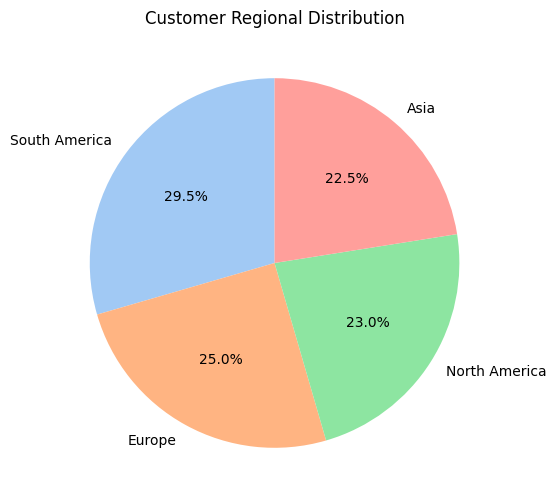

In [13]:
# 3. Regional Distribution of Customers
plt.figure(figsize=(8, 6))
customers['Region'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Customer Regional Distribution')
plt.ylabel('')
plt.show()

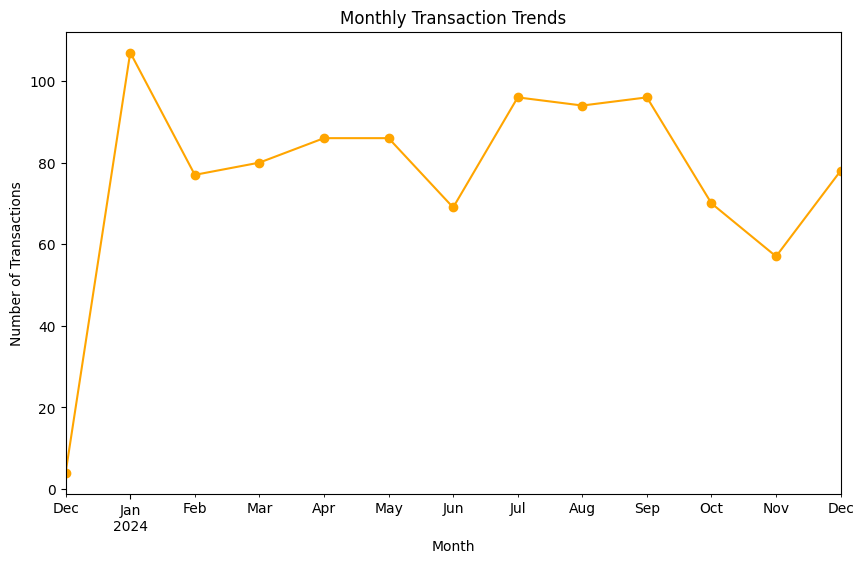

In [14]:
# 4. Monthly Transaction Trends
plt.figure(figsize=(10, 6))
transactions['TransactionDate'].dt.to_period('M').value_counts().sort_index().plot(kind='line', marker='o', color='orange')
plt.title('Monthly Transaction Trends')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()

C:\Users\shetd\AppData\Local\Temp\ipykernel_241800\1938854394.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalValue', y='ProductName', data=top_products, palette='coolwarm')


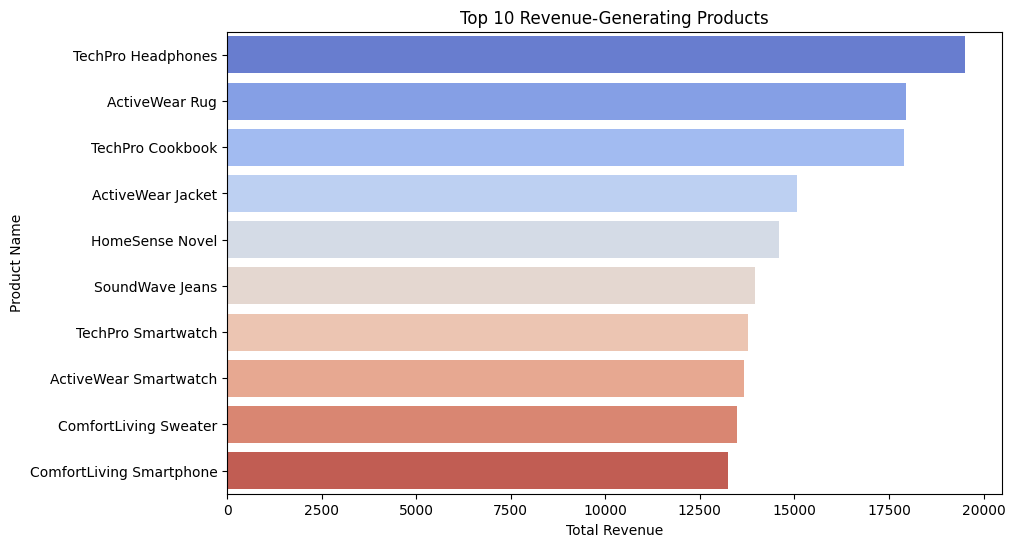

In [15]:
# 5. Top Revenue-Generating Products
top_products = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_product_names = products[products['ProductID'].isin(top_products.index)]
top_products = top_products.reset_index().merge(top_product_names, on='ProductID')

plt.figure(figsize=(10, 6))
sns.barplot(x='TotalValue', y='ProductName', data=top_products, palette='coolwarm')
plt.title('Top 10 Revenue-Generating Products')
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.show()